In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 
from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

dfo = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]

def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'discovery_month'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    #new invalid field - Humidity 0 is impossible on Earth
    df_clean = df_clean.drop(df_clean.loc[df_clean.Hum_pre_7 == 0].index).reset_index()
    return df_clean

df_sampled = preprocess_missing_weather_data(dfo)


property = 'fire_size'

s_c = 'ALL'

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: 0.51; max value: 606945.0


/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


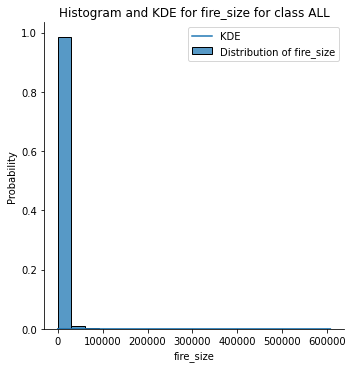

In [2]:
x = np.linspace(0, max_amount, num=50)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 20)

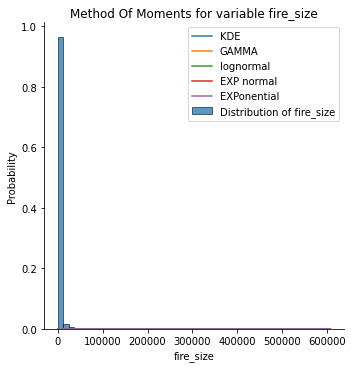

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.648851994199606, pvalue=4.3936271400959535e-21), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=5.274512466284134, pvalue=1.315085818021089e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5773497872551546, pvalue=2.4851692326772555e-16), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=4.465816141281072, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5756320936215731, pvalue=3.1557303606197334e-16), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=4.452677340731855, pvalue=0)


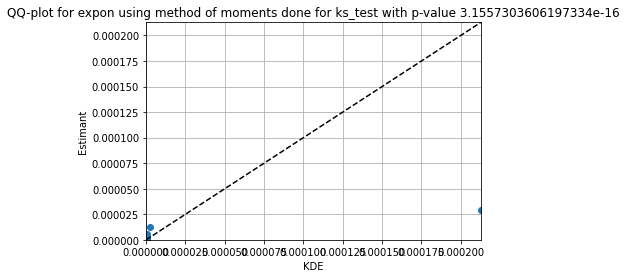

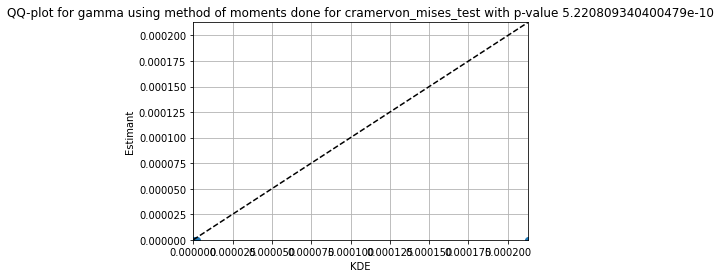

In [3]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

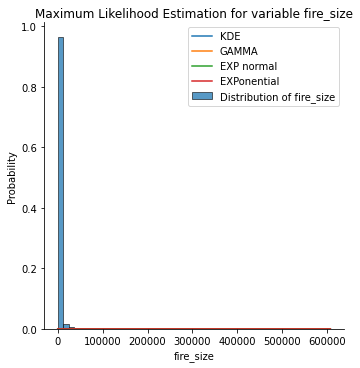

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9995397580566475, pvalue=2.8205885348361608e-167), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.643669832490456, pvalue=5.092070098910995e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


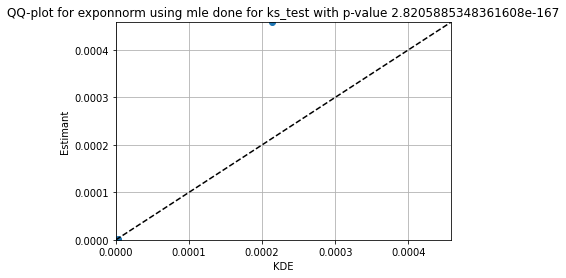

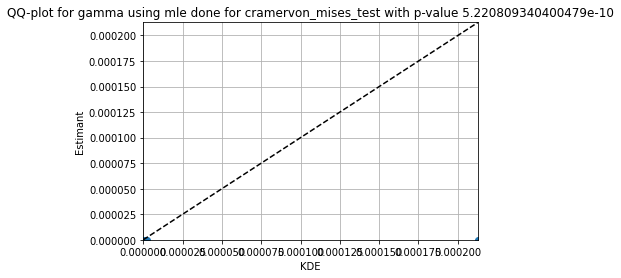

In [4]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

[1.00000000e+00 2.08948624e+03 1.46277434e+04]
[1.00000000e+00 2.08948624e+03 1.46277434e+04]


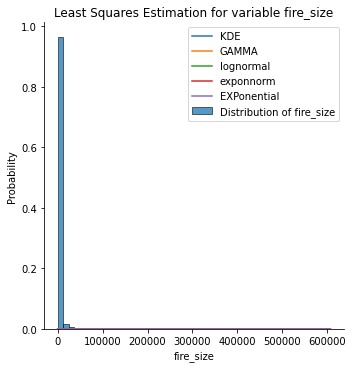

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7974797049837453, pvalue=1.188907996747075e-34), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=8.591375509088369, pvalue=1.0414402673575296e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


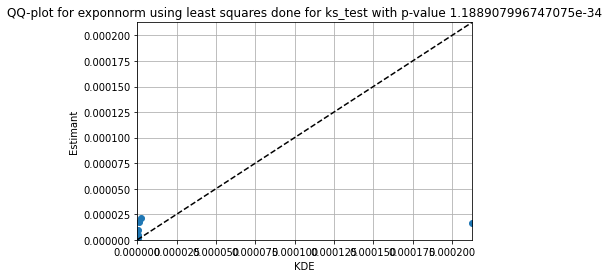

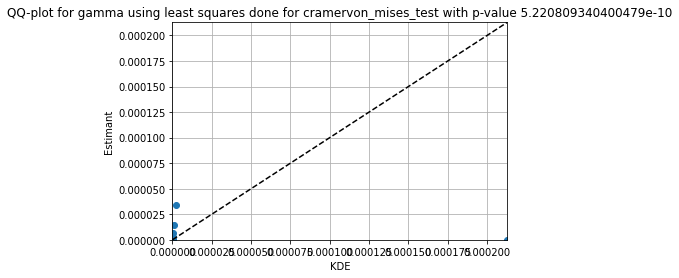

In [5]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

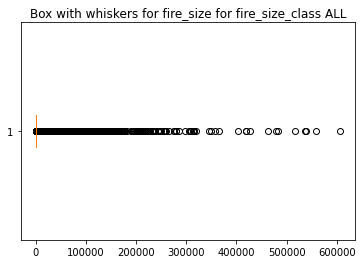

In [6]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()